### Project: Movie Rating Prediction Using Python
### Author: Sadia Noor
### Submitted to: CodSoft

### _Problem Statement: Build a model that predicts the rating of a movie based on features like genre, rating, and actors. You can use regression techniques to tackle this problem. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics._

# Data Exploration and Preprocessing

In [103]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
#Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [105]:
#Display the first 5 rows of the dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [106]:
#Pritn the no. of rows and cols of the dataset
shape = df.shape
print(f"Number of rows: {shape[0]}, Number of columns: {shape[1]}")

Number of rows: 15509, Number of columns: 10


In [107]:
#Print the information about the dataset such as number of cols, data type, and number of Non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Here, only Genre column has float data type and rest of the nine columns have object data type. 

In [108]:
#Print the basic statistics of the dataset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### As we have Rating as the float data type so df.describe() command provide the statistics for the Rating column only. Statistics include the number of counts, max value, min value, mean, standard deviation, 25th percentile, 75th percentile, and median.

In [109]:
#Print the attributes in our dataset
attributes = df.columns
print(attributes)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [110]:
#Checking for Null values
df.isnull().values.any()

True

In [111]:
#Prinitng total null values w.r.t each column
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### As we can see that only Name column doesn't contain any null values, but rest of the attributes contain the null values.

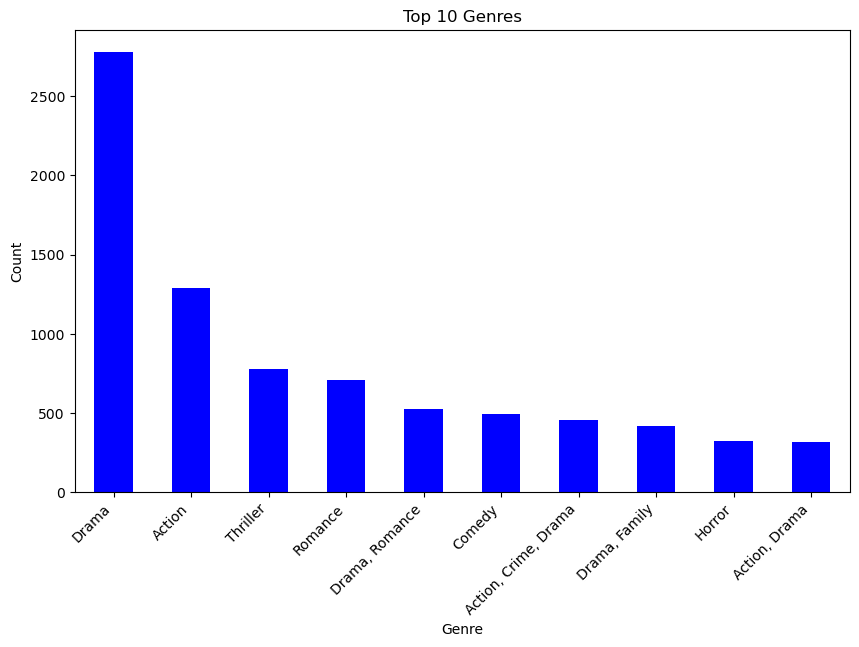

In [112]:
#Extract unique values from the 'Genre' column in the DataFrame 'df'
Unique_genres = df['Genre'].unique()

#Count the occurrences of each unique genre
genre_counts = df['Genre'].value_counts()

#Set the number of top genres to display
top_n = 10  #You can adjust this number as needed

#Select the top N genres
top_genres = genre_counts.head(top_n)

#Plotting the bar chart for the top N genres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='blue')
plt.title(f'Top {top_n} Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [113]:
rating_dist = df['Rating'].value_counts()
print("Rating Distributions:\n", rating_dist)

Rating Distributions:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


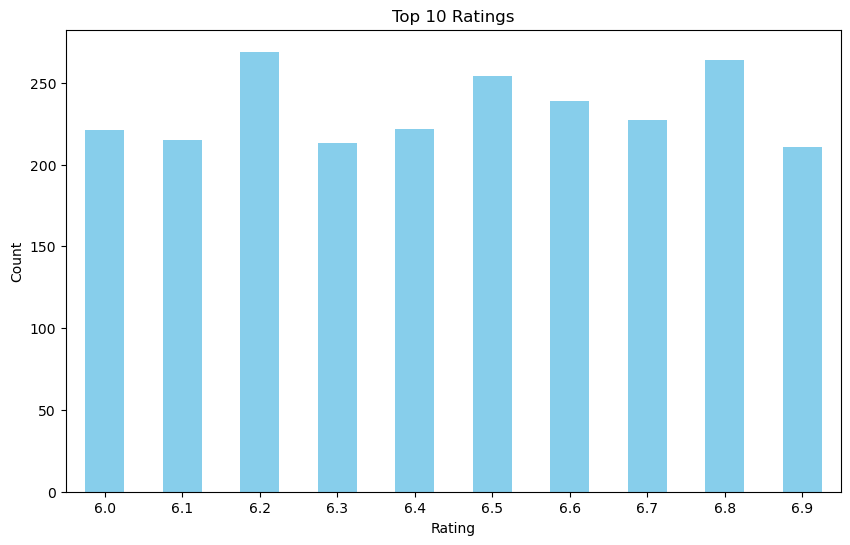

In [114]:
#Count the occurrences of rating
rating_dist = df['Rating'].value_counts()

#Set the number of top ratings to display
top_n_ratings = 10

#Select the top N ratings
top_ratings = rating_dist.head(top_n_ratings)

# Plotting the bar chart for the top N ratings
plt.figure(figsize=(10, 6))
top_ratings.sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n_ratings} Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [115]:
#Identify duplicates
duplicate = df[df.duplicated()]
print("Duplicate Rows:\n" , duplicate)

Duplicate Rows:
                             Name    Year Duration     Genre  Rating Votes  \
1250   Arab Ka Sona - Abu Kaalia  (1979)      NaN    Action     NaN   NaN   
1769                     Balidan  (1992)      NaN     Drama     NaN   NaN   
4723     First Time - Pehli Baar  (2009)      NaN       NaN     NaN   NaN   
9713                     Musafir     NaN      NaN  Thriller     NaN   NaN   
13069                    Shivani  (2019)      NaN     Crime     NaN   NaN   
13308          Slumdog Karodpati  (2019)  118 min  Thriller     NaN   NaN   

                  Director      Actor 1       Actor 2     Actor 3  
1250        Master Bhagwan    Meena Rai    Dara Singh         NaN  
1769                   NaN          NaN           NaN         NaN  
4723          Raja Bundela  Zeenat Aman   Nitin Arora  Raj Babbar  
9713           Shiva Dagar          NaN           NaN         NaN  
13069  Ugresh Prasad Ujala      Santosh           NaN         NaN  
13308        Rajesh Patole  Udhav G

In [116]:
#Drop duplicates
df.drop_duplicates(inplace = True)

In [117]:
#Defines a list of attributes
attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
df.dropna(subset = attributes, inplace = True)
missing_val = df.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [118]:
#Remove rows with missing values in the specified subset of columns (attributes).
df.dropna(subset = attributes, inplace = True)

### The subset parameter is set to attributes, meaning that rows containing NaN values in any of the specified columns will be dropped.

In [119]:
#Prints the count of missing values for each column in the updated DataFrame
missing_val = df.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [120]:
#Print the dataset
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


### It has now 5451 rows and 10 columns, as we deleted the duplicates. 

In [121]:
#Create a new DataFrame that contains only the Name adn Rating columns
movie_name_rating = df[['Name', 'Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


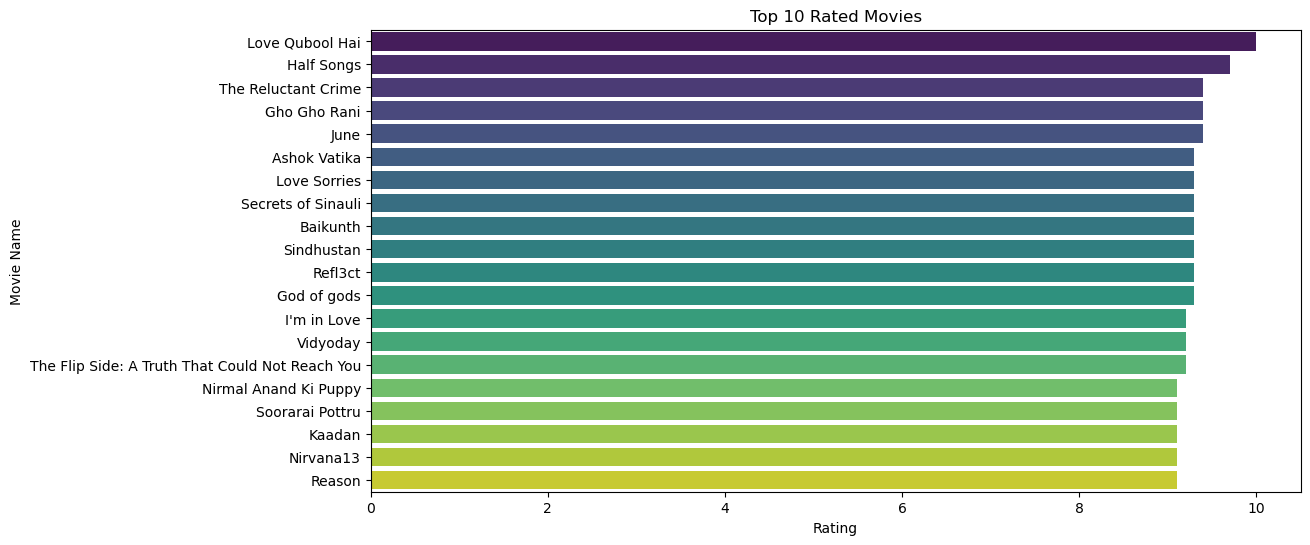

In [122]:
#Sort the DataFrame by 'Rating' in descending order to get the top-rated movies
top_rated_movies = df.sort_values(by='Rating', ascending=False).head(20)

#Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Name', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

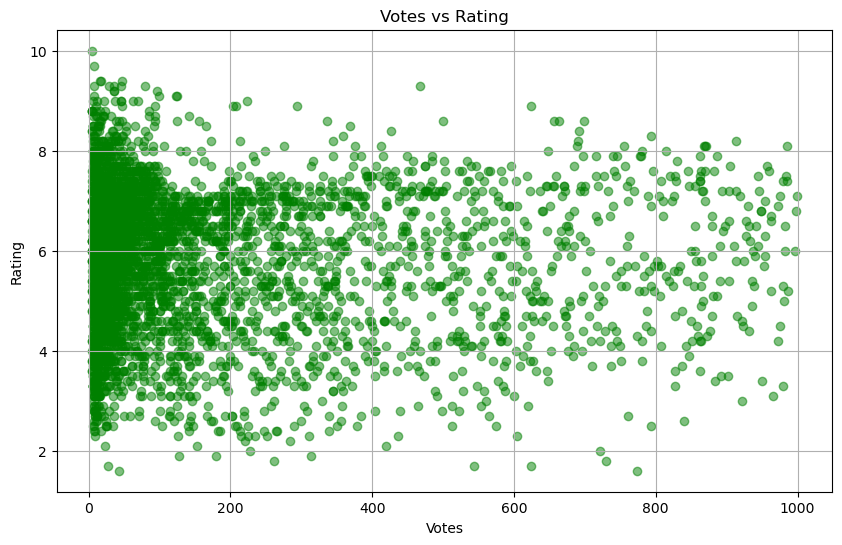

In [123]:
#Convert 'Votes' to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

#Scatter plot of Votes vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Rating'], alpha=0.5, c='green')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

The errors = 'coerce' argument will replace any non-numeric values with NaN.

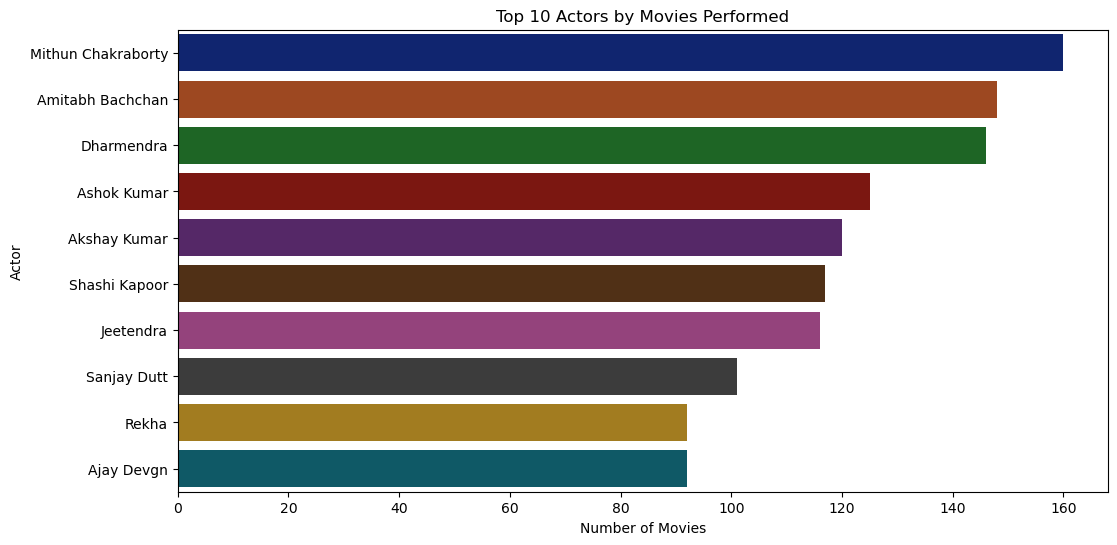

In [124]:
#Create a new DataFrame to hold actor counts
actors_df = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

#Count the number of movies for each actor
actor_counts = actors_df.value_counts()

#Get the top 10 actors
top_10_actors = actor_counts.head(10)

#Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='dark')
plt.title('Top 10 Actors by Movies Performed')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

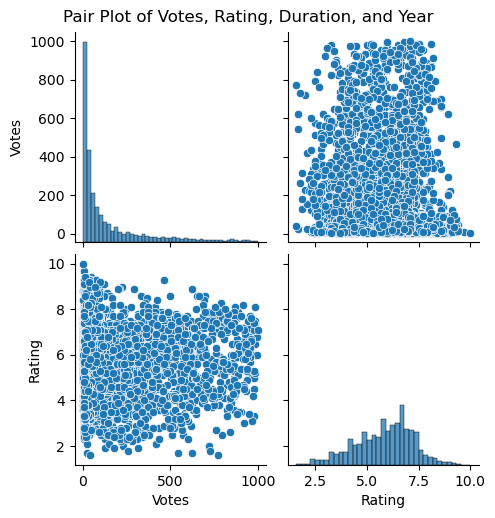

In [125]:
#Selecting the relevant columns
selected_columns = ['Votes', 'Rating', 'Duration', 'Year']
df_selected = df[selected_columns]

#Drop rows with missing values for the selected columns
df_selected = df_selected.dropna()

#Creating a pair plot
sns.pairplot(df_selected)
plt.suptitle('Pair Plot of Votes, Rating, Duration, and Year', y=1.02)
plt.show()

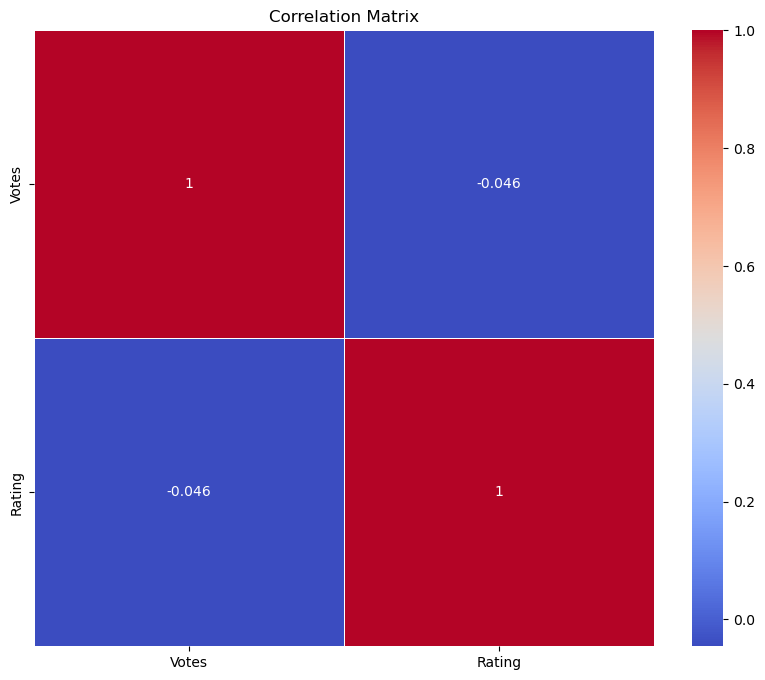

In [126]:
#Selecting the relevant columns
selected_columns = ['Votes', 'Rating', 'Duration', 'Year']
df_selected = df[selected_columns]

#Drop rows with missing values for the selected columns
df_selected = df_selected.dropna()

#Calculate the correlation matrix
correlation_matrix = df_selected.corr(numeric_only=True)

#Plotting the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering 

In [127]:
df_sorted = df.sort_values(by = 'Votes', ascending = False)
df_sorted['Vote_Count_Percentile'] = df_sorted['Votes'].rank(pct = True)*100
df_sorted.reset_index(drop = True, inplace = True)
print(df_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [128]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [129]:
df = df.dropna(subset = ['Votes'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Model Training and Testing 

In [130]:
# assuming df is your DataFrame
df = df.copy() # this makes a copy of df so pandas knows we're working with a fresh copy

df = df.assign(Year=df['Year'].astype(str))
df = df.assign(Duration=df['Duration'].astype(str))
df = df.assign(Year=df['Year'].str.extract('(\d+)').astype(float))
df = df.assign(Duration=df['Duration'].str.extract('(\d+)').astype(float))

X = df[['Year', 'Duration','Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 32)

In [131]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
y_pred = model.predict(X_test)

In [133]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared {r2}")

Mean Absolute Error: 1.0028702437645352
Root Mean Squared Error: 1.2769563246234705
R-Squared 0.09161998639351987


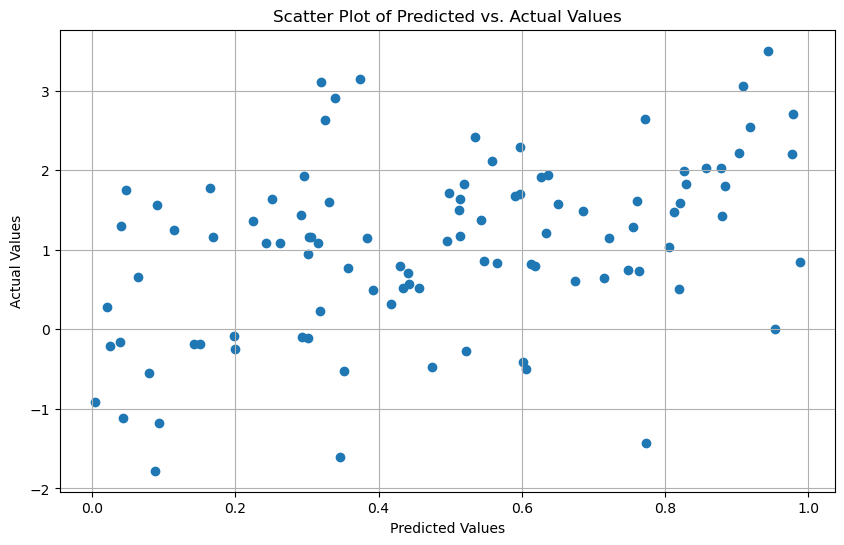

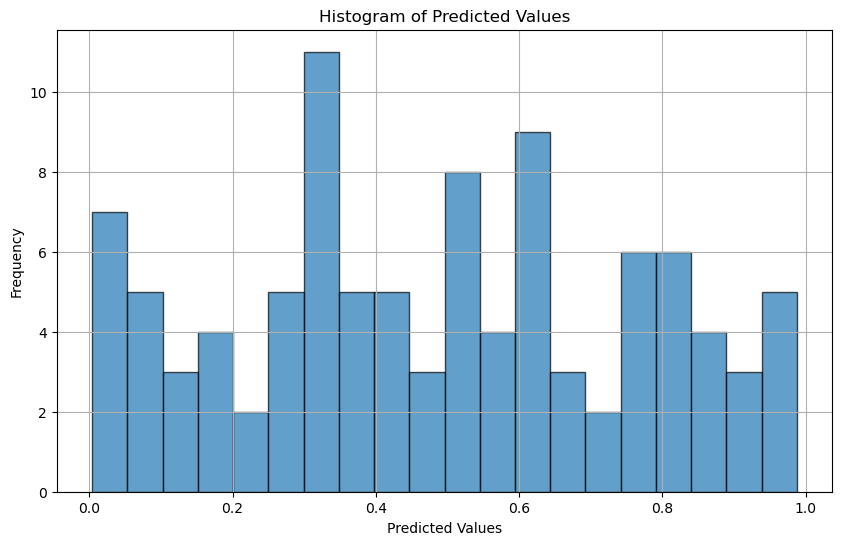

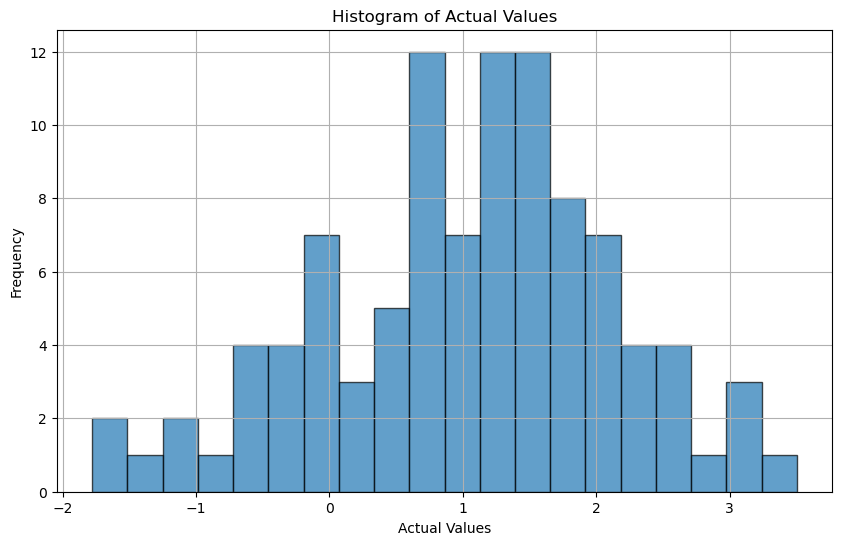

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(10)
x = np.random.rand(100)
y = 2 * x + np.random.randn(100)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()

# Create histogram of predicted values
plt.figure(figsize=(10, 6))
plt.hist(x, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.grid(True)
plt.show()

# Create histogram of actual values
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.grid(True)
plt.show()
